# Material Properties

In [1]:
import swolfpy_inputdata
from swolfpy_inputdata import CommonData
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "12"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

#### swolfpy_inputdata's Version
* Note: Check that you have the same version to get the same results.

In [2]:
swolfpy_inputdata.__version__

'1.0.0'

## Included physical and chemical properties

In [3]:
commondata = CommonData()
properties = commondata.Material_Properties
properties_info = commondata.Material_Properties_Info

for i,j in enumerate(properties_info.columns):
    print("{}: {} [{}]".format(i,j, properties_info[j]['Unit']))

0: Moisture Content [%]
1: Volatile Solids [%TS]
2: Ash Content [%]
3: Lower Heating Value [MJ/dry kg]
4: Lab Decay Rate [yr-1]
5: Bulk Density [kg/m3]
6: Carbon Storage Factor [kg C/dry Mg]
7: Biogenic Carbon Content [% TS]
8: Ultimate Biogenic C Converted to Biogas [nan]
9: Fossil Carbon Content [% TS]
10: Hydrogen Content [% TS]
11: Oxygen Content [% TS]
12: Nitrogen Content [% TS]
13: Phosphorus Content [% TS]
14: Potassium Content [% TS]
15: Iron [% TS]
16: Copper [% TS]
17: Cadmium [% TS]
18: Arsenic [% TS]
19: Mercury [% TS]
20: Selenium [% TS]
21: Chromium [% TS]
22: Lead [% TS]
23: Zinc [% TS]
24: Barium [% TS]
25: Antimony [% TS]
26: Nickel [% TS]
27: Silver [% TS]
28: Chlorine [% TS]
29: Sulphur [% TS]
30: Aluminum [% TS]


In [4]:
commondata.Material_Properties.describe()

,Moisture Content,Volatile Solids,Ash Content,Lower Heating Value,Lab Decay Rate,Bulk Density,Carbon Storage Factor,Biogenic Carbon Content,Ultimate Biogenic C Converted to Biogas,Fossil Carbon Content,Hydrogen Content,Oxygen Content,Nitrogen Content,Phosphorus Content,Potassium Content,Iron,Copper,Cadmium,Arsenic,Mercury,Selenium,Chromium,Lead,Zinc,Barium,Antimony,Nickel,Silver,Chlorine,Sulphur,Aluminum
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.0,44.0,44.0,44.000000,44.000000,44.000000
mean,13.684318,58.887955,41.110909,14.060682,3.702955,320.050000,115.695455,19.404545,18.460682,15.599500,4.654409,18.204864,0.561227,0.086214,0.277550,6.008008,0.013301,0.000045,0.008260,0.000011,6.157727e-07,0.018635,0.003709,0.021498,0.000038,0.0,0.0,0.0,0.175000,0.138848,7.276770
std,20.284125,44.211234,44.211044,12.764942,6.560879,399.671956,157.666535,22.105939,28.098506,29.432425,4.068920,18.525580,0.923733,0.177037,0.393627,18.971121,0.021992,0.000121,0.049692,0.000010,1.096019e-06,0.064019,0.005782,0.056559,0.000064,0.0,0.0,0.0,0.719468,0.229644,20.195353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.200000,0.000000,5.347500,0.000000,0.000000,62.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011900,0.037400,0.082825,0.001395,0.000004,0.000020,0.000002,0.000000e+00,0.000771,0.000383,0.004148,0.000000,0.0,0.0,0.0,0.000000,0.009725,0.100875
50%,7.415000,87.400000,12.600000,14.800000,0.000000,145.000000,0.000000,0.000000,0.000000,0.000000,5.730000,13.450000,0.100000,0.023750,0.081750,0.148000,0.003430,0.000012,0.000048,0.000007,0.000000e+00,0.002730,0.001810,0.008340,0.000000,0.0,0.0,0.0,0.000000,0.070900,0.502500
75%,13.775000,94.650000,100.000000,20.125000,3.315000,425.000000,242.000000,43.475000,35.200000,9.972500,6.640000,38.775000,0.806000,0.055425,0.384500,0.240000,0.010485,0.000036,0.000326,0.000020,5.050000e-07,0.012175,0.006640,0.022700,0.000046,0.0,0.0,0.0,0.005000,0.200000,1.325000
max,78.300000,100.000000,100.000000,42.100000,31.100000,1300.000000,542.000000,56.100000,87.600000,86.100000,13.700000,47.800000,3.310000,0.996000,1.270000,72.700000,0.089200,0.000791,0.330000,0.000049,3.060000e-06,0.414000,0.031900,0.380000,0.000195,0.0,0.0,0.0,4.610000,1.300000,86.100000


## Moisture, Volatile solid, and Ash contents
* Moisture content + Solid content(%wet) = 100%
* Ash content(%TS) + VS content(%TS) = 100%
* Moisture content + VS content(%wet) + Ash content(%wet) = 100

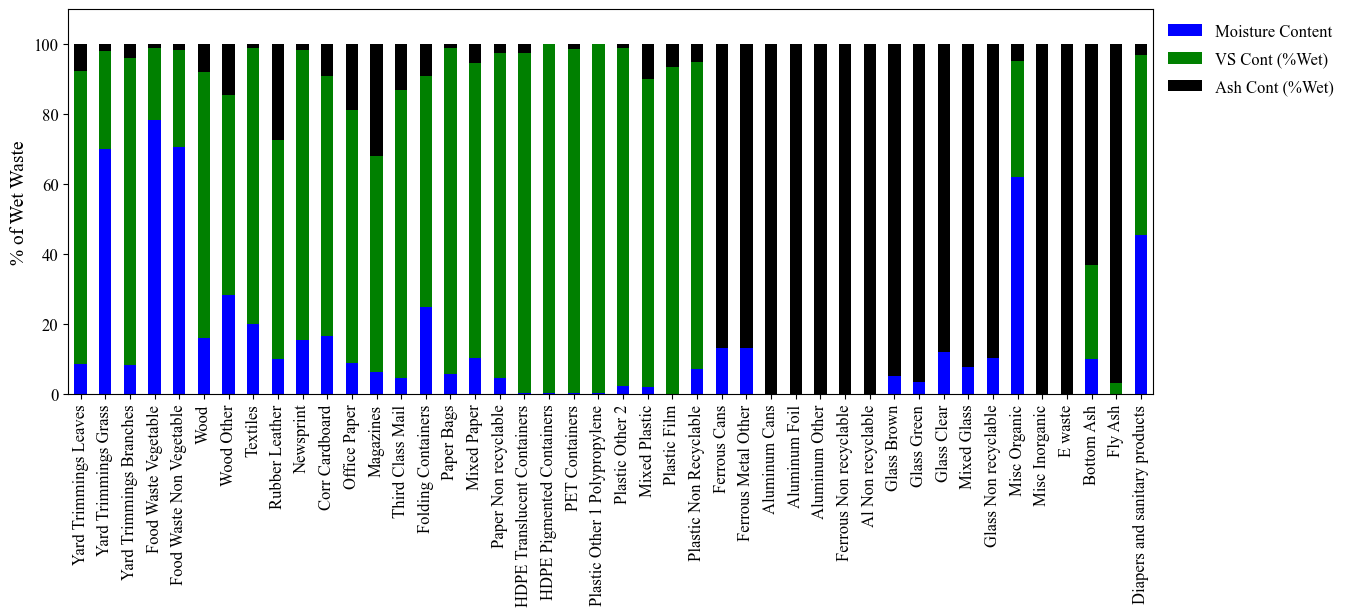

In [5]:
properties['VS Cont (%Wet)'] = (100 - properties['Moisture Content'].values) * properties['Volatile Solids'].values / 100
properties['Ash Cont (%Wet)'] = (100 - properties['Moisture Content'].values) * properties['Ash Content'].values / 100

fig, ax = plt.subplots(figsize=(14, 5))
properties[['Moisture Content','VS Cont (%Wet)', 'Ash Cont (%Wet)']].plot(kind='bar', stacked=True, ax=ax, color=['b','g','k'])

ax.set_ylim((0,110))
ax.set_ylabel('% of Wet Waste', fontdict={'size':14})
ax.set_xticklabels([x.replace('_', ' ') for x in commondata.Index])
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')

## Solid content (Ash + Volatile Solids)

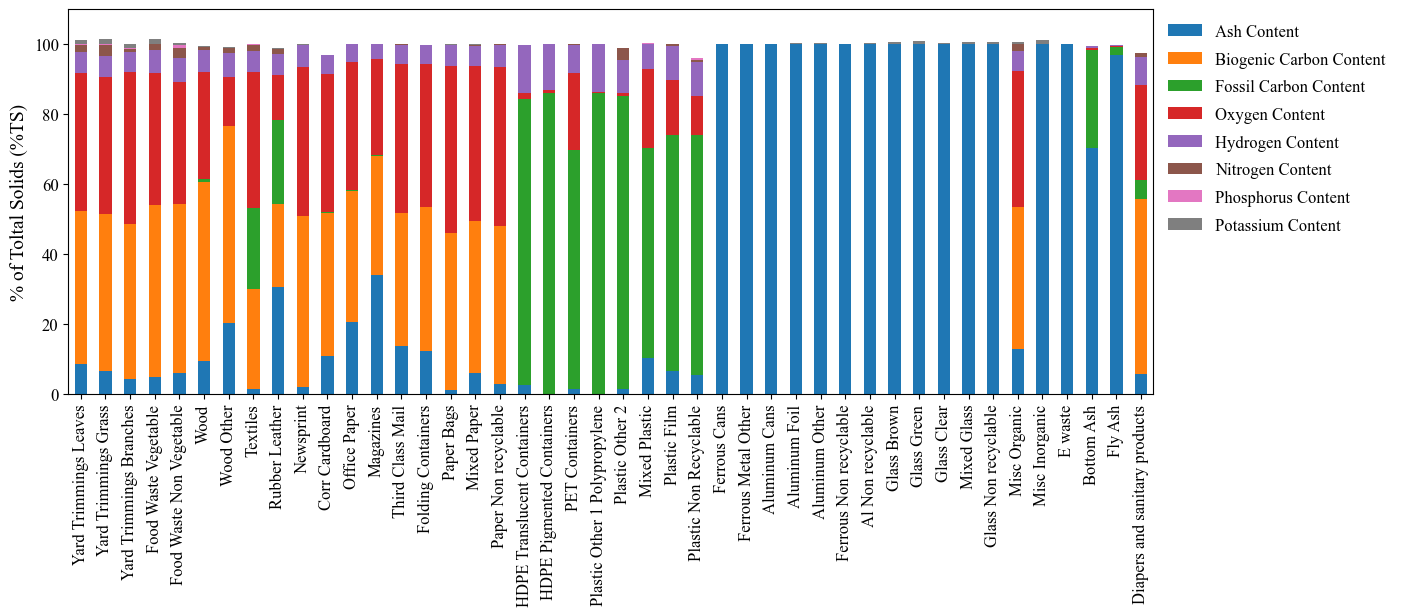

In [6]:
fig, ax = plt.subplots(figsize=(14, 5))
data = ['Ash Content', 'Biogenic Carbon Content', 'Fossil Carbon Content', 'Oxygen Content',
        'Hydrogen Content', 'Nitrogen Content', 'Phosphorus Content', 'Potassium Content']
properties[data].plot(kind='bar', stacked=True, ax=ax)

ax.set_ylim((0,110))
ax.set_ylabel('% of Toltal Solids (%TS)', fontdict={'size':14})
ax.set_xticklabels([x.replace('_', ' ') for x in commondata.Index])
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')

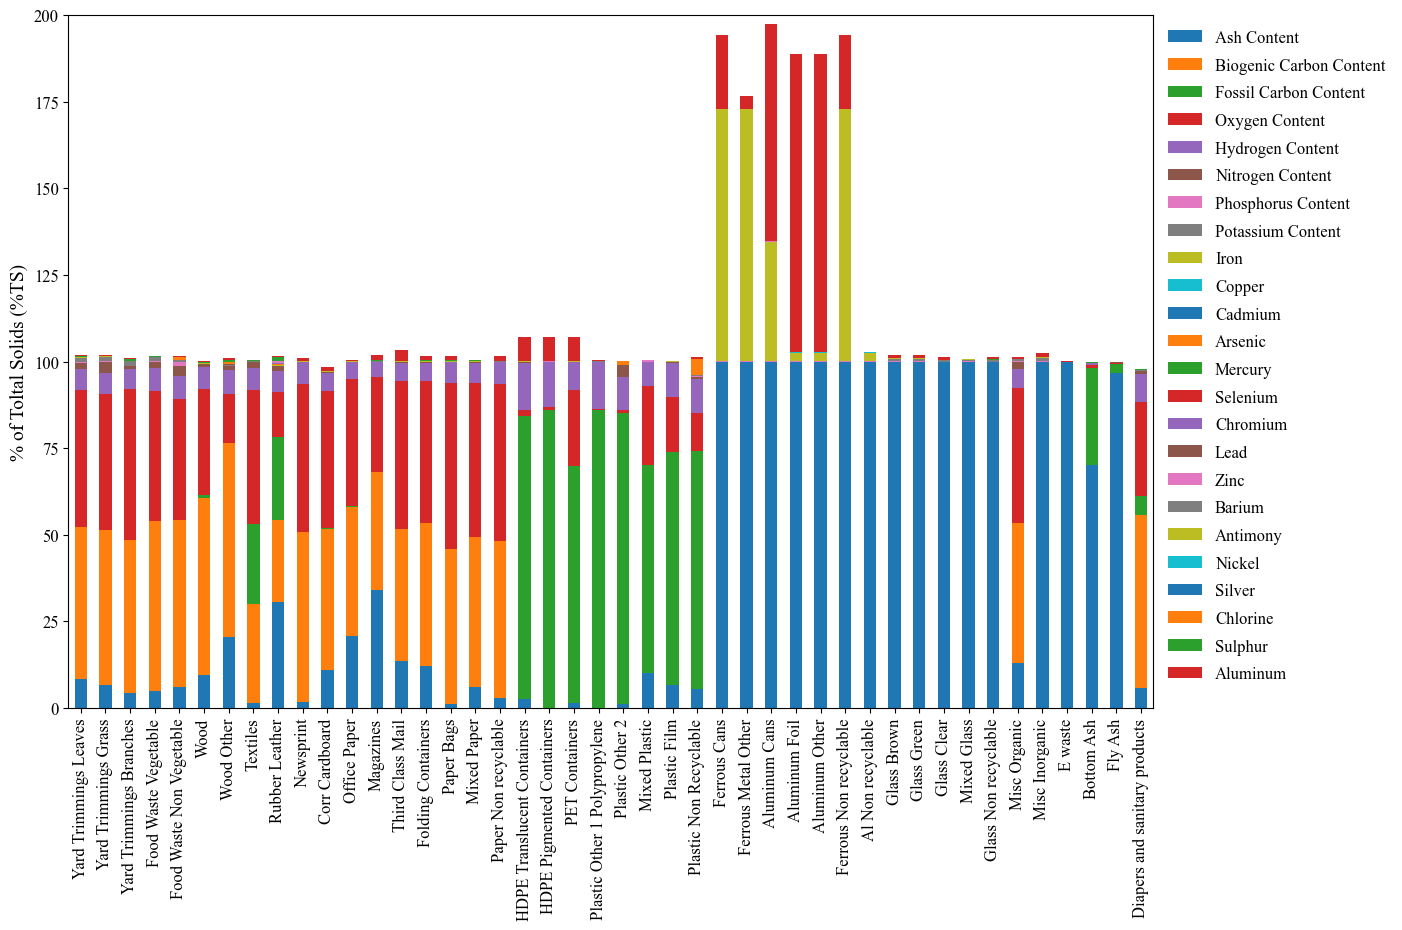

In [7]:
fig, ax = plt.subplots(figsize=(14, 9))
data = ['Ash Content', 'Biogenic Carbon Content', 'Fossil Carbon Content', 'Oxygen Content',
        'Hydrogen Content', 'Nitrogen Content', 'Phosphorus Content', 'Potassium Content', 'Iron',
        'Copper', 'Cadmium', 'Arsenic', 'Mercury', 'Selenium', 'Chromium', 'Lead', 'Zinc', 'Barium',
        'Antimony', 'Nickel', 'Silver', 'Chlorine', 'Sulphur', 'Aluminum']
properties[data].plot(kind='bar', stacked=True, ax=ax)

ax.set_ylim((0,200))
ax.set_ylabel('% of Toltal Solids (%TS)', fontdict={'size':14})
ax.set_xticklabels([x.replace('_', ' ') for x in commondata.Index])
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')

In [8]:
fig.savefig('composition.png', dpi=300, bbox_inches='tight')

## Decay Rate

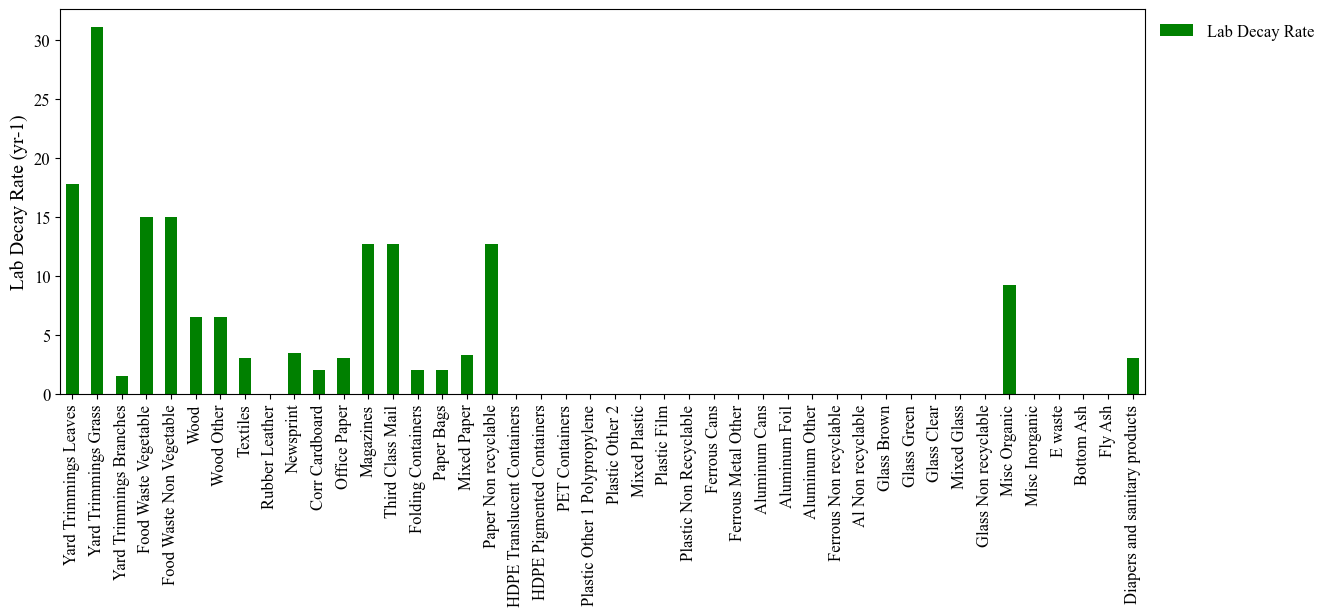

In [9]:
fig, ax = plt.subplots(figsize=(14, 5))
properties[['Lab Decay Rate']].plot(kind='bar', stacked=True, ax=ax, color='g')

ax.set_ylabel('Lab Decay Rate ({})'.format(properties_info['Lab Decay Rate']['Unit']), fontdict={'size':14})
ax.set_xticklabels([x.replace('_', ' ') for x in commondata.Index])
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')

## Carbon storage

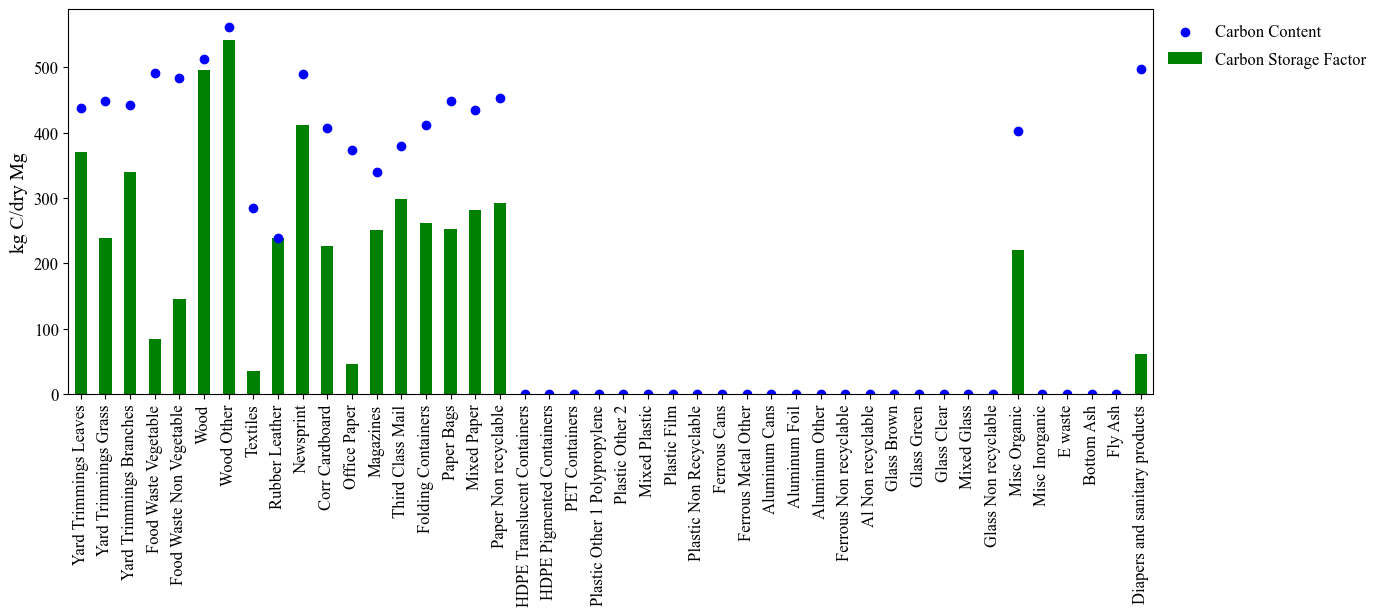

In [10]:
fig, ax = plt.subplots(figsize=(14, 5))
properties[['Carbon Storage Factor']].plot(kind='bar', stacked=True, ax=ax, color='g')

ax.set_ylabel(properties_info['Carbon Storage Factor']['Unit'], fontdict={'size':14})
ax.set_xticklabels([x.replace('_', ' ') for x in commondata.Index])

Carbon = properties['Biogenic Carbon Content'] / 100 * 1000
ax.scatter(y=Carbon, x= Carbon.index, c='b', label='Carbon Content')

legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')

## Lower Heating Value (LHV)

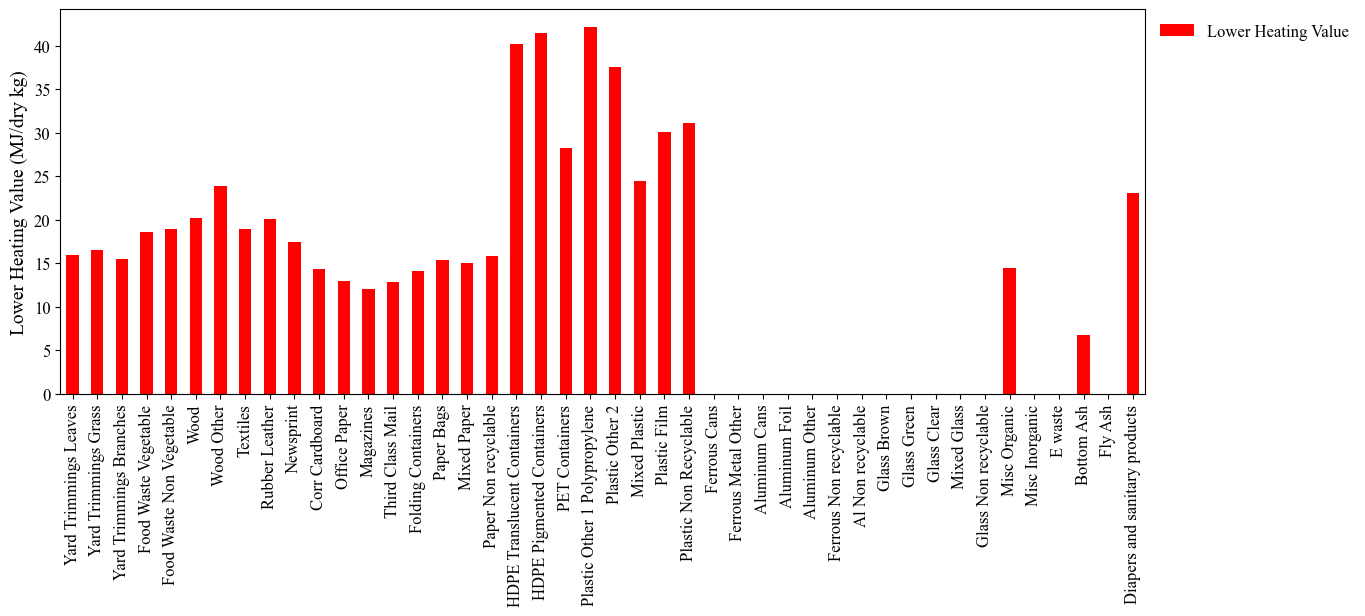

In [11]:
fig, ax = plt.subplots(figsize=(14, 5))
properties[['Lower Heating Value']].plot(kind='bar', stacked=True, ax=ax, color='r')

ax.set_ylabel('Lower Heating Value ({})'.format(properties_info['Lower Heating Value']['Unit']), fontdict={'size':14})
ax.set_xticklabels([x.replace('_', ' ') for x in commondata.Index])
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')